In [48]:
import pandas as pd
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#1 importing avocado data
avocado_data = pd.read_csv("avocado.csv")

In [7]:
# 1.1 last 4 rows and the five columns
last_rows_columns = avocado_data.iloc[-4, -5:]
print("last 4 rows and last 5 columns:")
print(last_rows_columns)

last 4 rows and last 5 columns:
Large Bags                324.8
XLarge Bags                 0.0
type                    organic
year                       2018
region         WestTexNewMexico
Name: 18245, dtype: object


In [9]:
avocado_data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
# 1.2 Multiply the Total Volume and AveragePrice columns and store the result in a new column

avocado_data['EstimatedRevenue'] = avocado_data['Total Volume'] * avocado_data['AveragePrice']
print("\nFirst 5 rows with the new 'EstimatedRevenue' column:")
print(avocado_data[['Total Volume', 'AveragePrice', 'EstimatedRevenue']].head())





First 5 rows with the new 'EstimatedRevenue' column:
   Total Volume  AveragePrice  EstimatedRevenue
0      64236.62          1.33        85434.7046
1      54876.98          1.35        74083.9230
2     118220.22          0.93       109944.8046
3      78992.15          1.08        85311.5220
4      51039.60          1.28        65330.6880


In [12]:
# 1.3 Create a grouped DataFrame by region and type, including the average price
grouped_data = avocado_data.groupby(['region', 'type'])['AveragePrice'].mean().reset_index()
print("\nGrouped data by region and type with average price:")
print(grouped_data.head())


Grouped data by region and type with average price:
                region          type  AveragePrice
0               Albany  conventional      1.348757
1               Albany       organic      1.773314
2              Atlanta  conventional      1.068817
3              Atlanta       organic      1.607101
4  BaltimoreWashington  conventional      1.344201


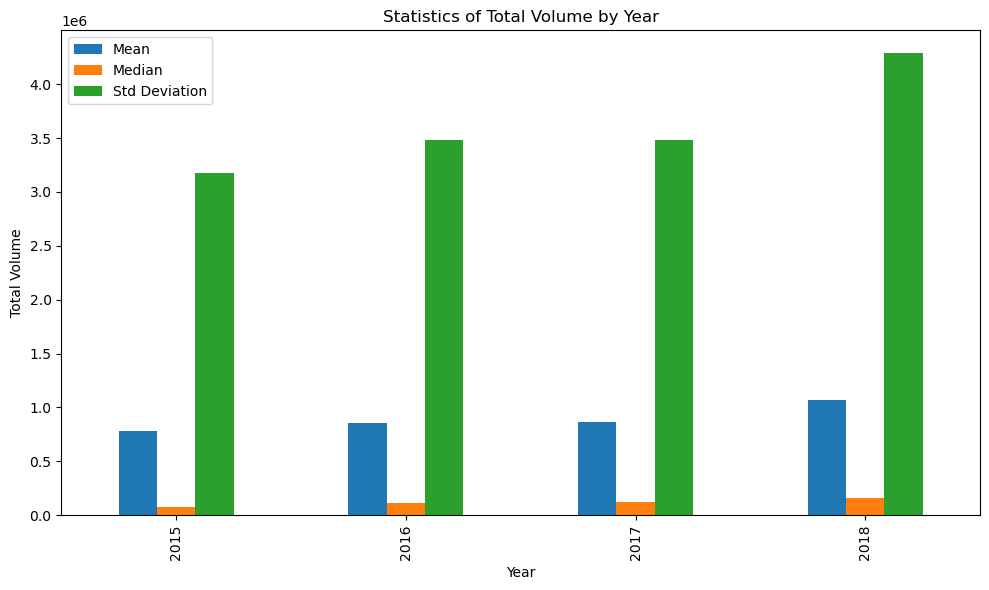

In [13]:
# 1.4 Create a bar plot for the mean, median, and standard deviation of Total Volume by year

volume_stats = avocado_data.groupby('year')['Total Volume'].agg(['mean', 'median', 'std']).reset_index()
volume_stats.plot(x='year', kind='bar', figsize=(10, 6))

# Add plot labels and title
plt.title('Statistics of Total Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.legend(['Mean', 'Median', 'Std Deviation'])
plt.tight_layout()
plt.show()

In [14]:
# 1.5 How many unique regions are there?
#I used the nunique() function to count the number of unique regions in the region column.
unique_regions = avocado_data['region'].nunique()
print(f"\n1.5: Number of unique regions: {unique_regions}")



1.5: Number of unique regions: 54


In [15]:
# 1.6 What is the average price for each type of avocado (organic and conventional)?
# Grouping the data by "type" and calculating the mean of AveragePrice for each type.

average_price_by_type = avocado_data.groupby('type')['AveragePrice'].mean()
print("\n1.6: Average price for each type of avocado:")
print(average_price_by_type)



1.6: Average price for each type of avocado:
type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64


In [85]:
# 1.7 Which region has the lowest average price of organic avocados?
# filtering the data for organic avocados and using the group by region
# also used idxmin to find the region with minimum value

organic_prices = avocado_data[avocado_data['type'] == 'organic'].groupby('region')['AveragePrice'].mean()
lowest_price_region = organic_prices.idxmin()
lowest_price_value = organic_prices.min()
print(f"\n1.7: Region with the lowest average price of organic avocados: {lowest_price_region} (${lowest_price_value:.2f})")

print("Comment:")
print("filtering the data for organic avocados and using the group by region also used idxmin to find the region with minimum value")



1.7: Region with the lowest average price of organic avocados: Houston ($1.27)
Comment:
filtering the data for organic avocados and using the group by region also used idxmin to find the region with minimum value


In [20]:
# 1.8 Have the Total Bags sold per year of each type of avocado become more or less consistent over time?
# Calculate standard deviation of Total Bags per year for each type

# using (std()) of Total Bags per year for each type of avocado. Use descriptive statistics (describe()) to summarize the trends and compare consistency over time.

bags_stats = avocado_data.groupby(['year', 'type'])['Total Bags'].std().reset_index()
bags_stats_summary = bags_stats.groupby('type')['Total Bags'].describe()

print("\n1.8: Consistency of Total Bags sold per year for each type (Standard Deviation):")
print(bags_stats_summary)



1.8: Consistency of Total Bags sold per year for each type (Standard Deviation):
              count          mean            std            min           25%  \
type                                                                            
conventional    4.0  1.435186e+06  528799.365803  751853.493824  1.242267e+06   
organic         4.0  8.502493e+04   49478.802454   25891.488427  5.714492e+04   

                       50%           75%           max  
type                                                    
conventional  1.477699e+06  1.670618e+06  2.033493e+06  
organic       8.671551e+04  1.145955e+05  1.407772e+05  


In [86]:
# Comment on findings
print("\nComment:")
print("Consistency can be inferred from the standard deviation. A smaller standard deviation indicates higher consistency. By comparing these statistics, we can determine whether the sales of Total Bags for each avocado type have become more or less consistent over the years. From above findings using the standard dev it would seems organic prices have increased more than conventional avocados.")


Comment:
Consistency can be inferred from the standard deviation. A smaller standard deviation indicates higher consistency. By comparing these statistics, we can determine whether the sales of Total Bags for each avocado type have become more or less consistent over the years. From above findings using the standard dev it would seems organic prices have increased more than conventional avocados.


In [ ]:
# part 2

In [22]:
# 2.1 Create a new dataframe with total bags grouped by type

bags_grouped_by_type = avocado_data.groupby('type')[['Small Bags', 'Large Bags', 'XLarge Bags']].sum().reset_index()
print("\n2.1: Total number of bags grouped by type:")
print(bags_grouped_by_type)


2.1: Total number of bags grouped by type:
           type    Small Bags    Large Bags  XLarge Bags
0  conventional  3.164183e+09  9.259030e+08  56678255.60
1       organic  1.606877e+08  6.571281e+07     10921.73


In [30]:
print("\nComment:")
print("I used the groupby() to group data by type and sumed the small bags, large bags, and xLarge bags")


Comment:
I used the groupby() to group data by type and sumed the small bags, large bags, and xLarge bags


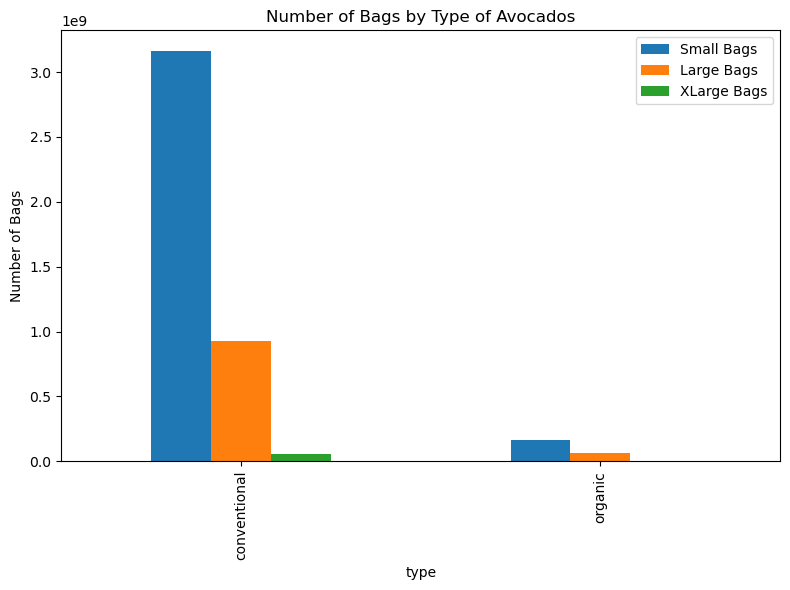

In [23]:
# 2.2 Create a bar plot for the grouped bag data
bags_grouped_by_type.plot(
    x='type',
    kind='bar',
    stacked=False,
    figsize=(8, 6),
    title='Number of Bags by Type of Avocados'
)
plt.ylabel('Number of Bags')
plt.tight_layout()
plt.show()

In [87]:
print("\nComment:")
print("Using the bar plot to visualize the number of each type of category. Small bags are bought more in conventional and organic compared to the rest of bag sizes")


Comment:
Using the bar plot to visualize the number of each type of category. Small bags are bought more in conventional and organic compared to the rest of bag sizes


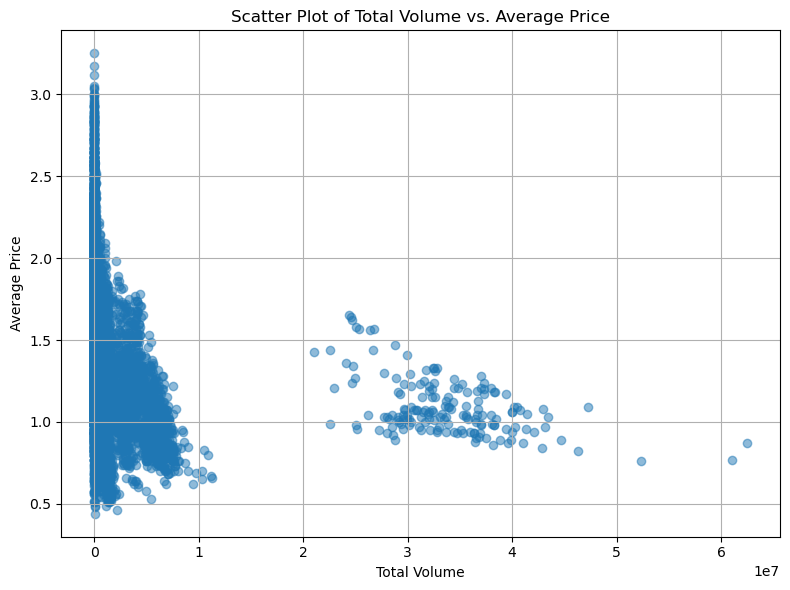

In [25]:
# 2.3 Scatter plot for Total Volume and AveragePrice
plt.figure(figsize=(8, 6))
plt.scatter(avocado_data['Total Volume'], avocado_data['AveragePrice'], alpha=0.5)
plt.title('Scatter Plot of Total Volume vs. Average Price')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.grid()
plt.tight_layout()
plt.show()

In [26]:
# 2.4 In what year were the most bags of avocados sold?
avocado_data['Total Bags'] = avocado_data['Small Bags'] + avocado_data['Large Bags'] + avocado_data['XLarge Bags']
bags_by_year = avocado_data.groupby('year')['Total Bags'].sum()
most_bags_year = bags_by_year.idxmax()
most_bags_value = bags_by_year.max()
print(f"\n2.4: Year with the most bags of avocados sold: {most_bags_year} ({most_bags_value:.0f} bags)")



2.4: Year with the most bags of avocados sold: 2017 (1646288737 bags)


In [33]:
print("Comment:")
print(" Usin group by year and sum total bags to determine the year with the most sales")

Comment:
 Usin group by year and sum total bags to determine the year with the most sales


In [27]:
# 2.5 Do the total bags of avocados appear to affect the average price?
correlation = avocado_data['Total Bags'].corr(avocado_data['AveragePrice'])
print(f"\n2.5: Correlation between Total Bags and Average Price: {correlation:.2f}")



2.5: Correlation between Total Bags and Average Price: -0.18


In [36]:
#  2.5 Comment on findings

if correlation > 0.5:
    print("Comment: There appears to be a strong positive correlation, indicating that more bags sold leads to higher average prices.")
elif correlation < -0.5:
    print("Comment: There appears to be a strong negative correlation, indicating that more bags sold leads to lower average prices.")
else:
    print("Comment: The correlation is weak, suggesting that the total bags of avocados sold does not significantly affect the average price.")

Comment: The correlation is weak, suggesting that the total bags of avocados sold does not significantly affect the average price.


In [ ]:
# Part 3

In [37]:
#importing the Gold data
gold_data = pd.read_csv("Gold.csv")

In [39]:
# making sure columns are treated as a datetime type
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

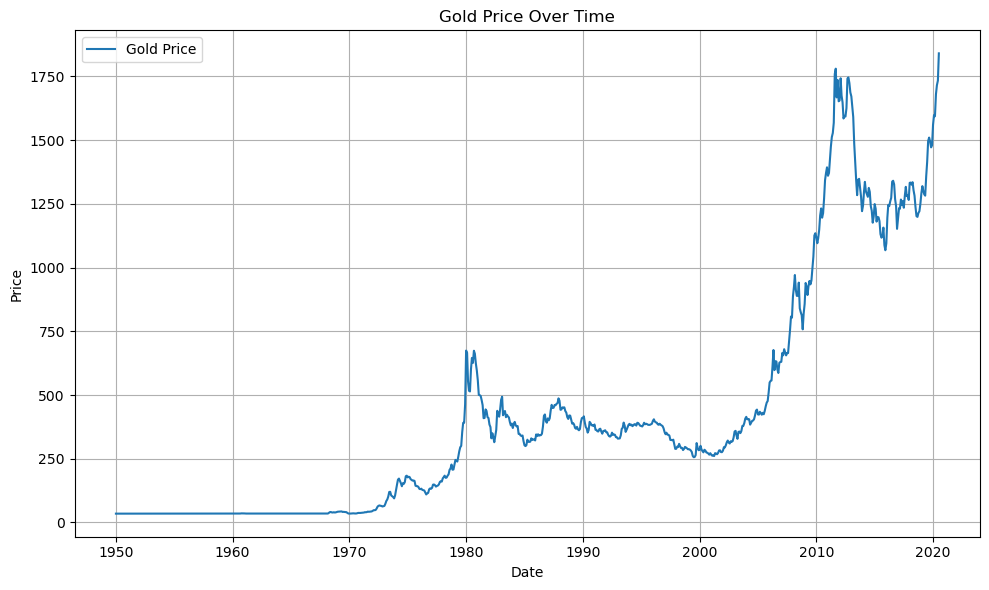

In [40]:
# 3.1 Creating a line plot

plt.figure(figsize=(10, 6))
plt.plot(gold_data['Date'], gold_data['Price'], label='Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
print("Comment:")
print("Just a little observation the price seems to increase has years increase this could be do to inflation.")

Comment:
Just a little observation the price seems to increase has years increase this could be do to inflation.


In [41]:
# 3.2 Index the data on the Date column and generate periods for the first day of each year (YS)
gold_data.set_index('Date', inplace=True)
year_start = pd.date_range(start=gold_data.index.min(), end=gold_data.index.max(), freq='YS')
print("\n3.2: Periods for the first day of each year:")
print(year_start)



3.2: Periods for the first day of each year:
DatetimeIndex(['1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01', '1960-01-01', '1961-01-01',
               '1962-01-01', '1963-01-01', '1964-01-01', '1965-01-01',
               '1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01',
               '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2

In [89]:
print("Comment:")
print(" setting the index and periods for the first day of each year(YS) I used pd.date_range().")

Comment:
 setting the index and periods for the first day of each year(YS) I used pd.date_range().


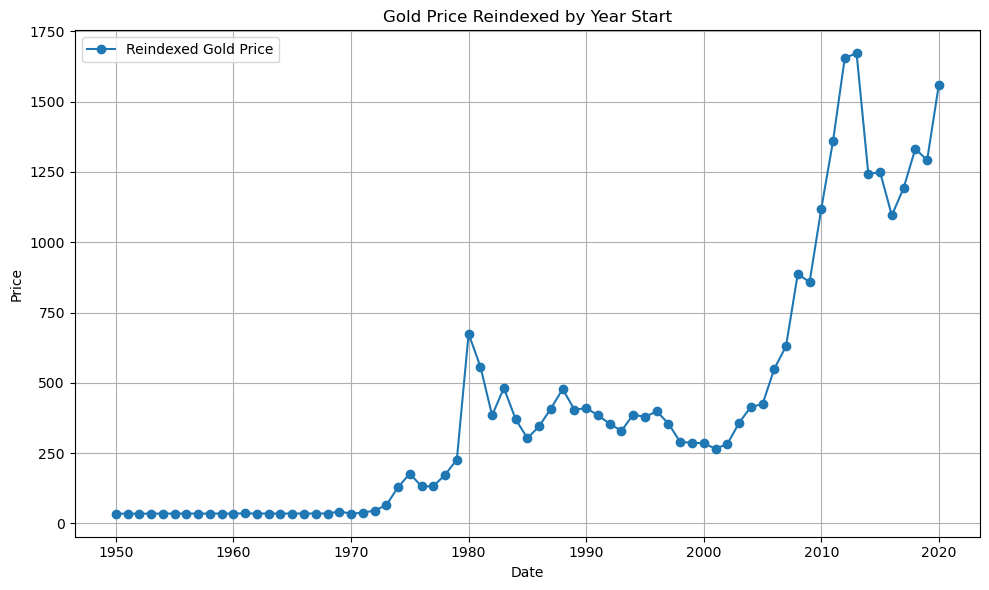

In [42]:
# 3.3 Reindex the data using the new periods and plot the reindexed data
reindexed_gold = gold_data.reindex(year_start)
plt.figure(figsize=(10, 6))
plt.plot(reindexed_gold.index, reindexed_gold['Price'], marker='o', label='Reindexed Gold Price')
plt.title('Gold Price Reindexed by Year Start')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

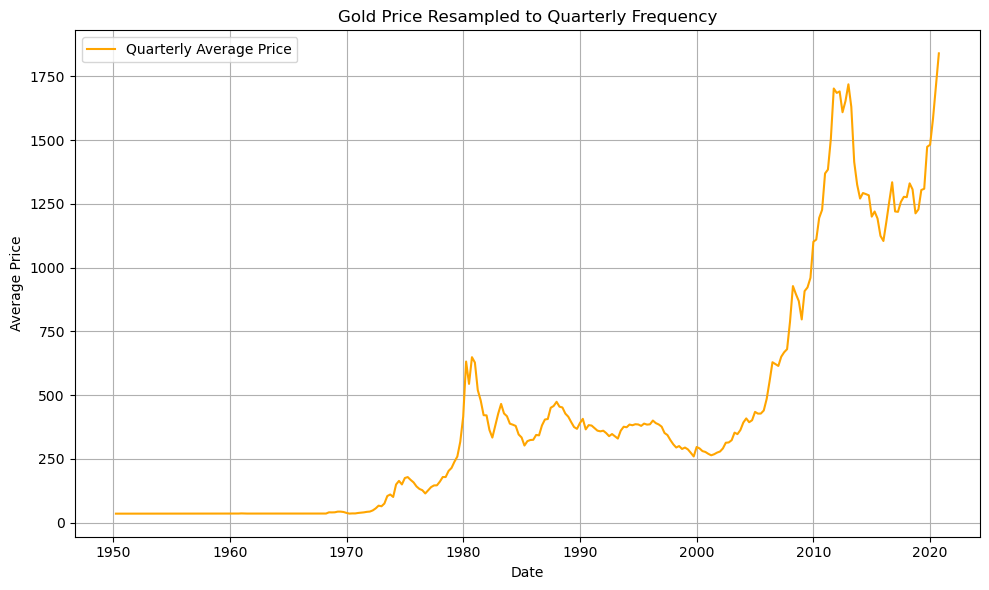

In [43]:
# 3.4 Resample the data to a quarterly frequency and plot the data

quarterly_gold = gold_data['Price'].resample('Q').mean()
plt.figure(figsize=(10, 6))
plt.plot(quarterly_gold.index, quarterly_gold, label='Quarterly Average Price', color='orange')
plt.title('Gold Price Resampled to Quarterly Frequency')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
print("Comment:")
print(" Using the .resample('Q') and the price to plot each quarter.")

Comment:
 Using the .resample('Q') and the price to plot each quarter.


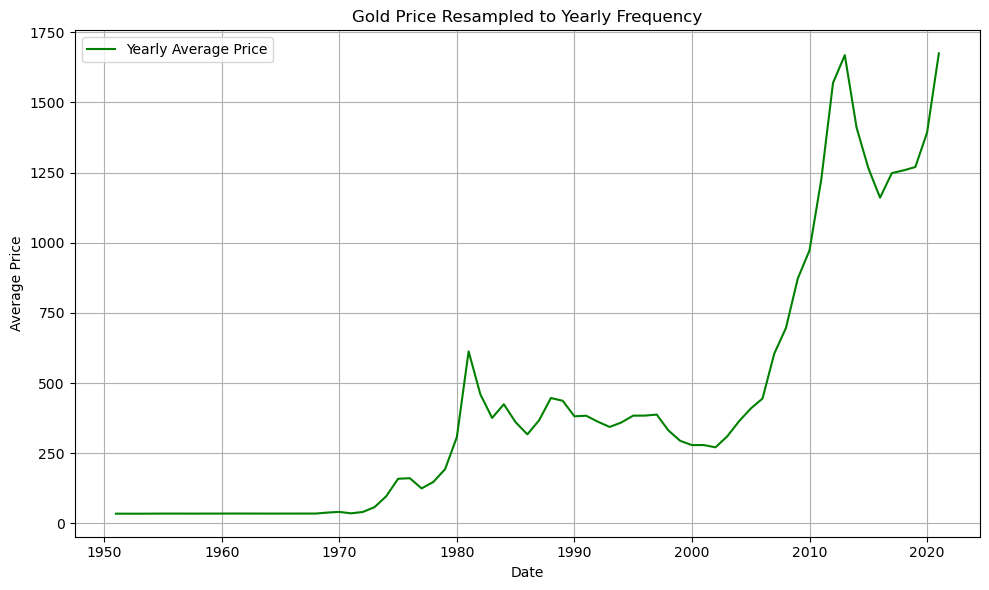

In [44]:
# 3.5 Resample the data to a yearly frequency and plot the data

yearly_gold = gold_data['Price'].resample('Y').mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_gold.index, yearly_gold, label='Yearly Average Price', color='green')
plt.title('Gold Price Resampled to Yearly Frequency')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# part 4

In [49]:
# Load the diamonds dataset
diamond = sns.load_dataset('diamonds')


In [51]:
# converting categorical columns to dummy variables

diamond = pd.get_dummies(diamond, drop_first=True)


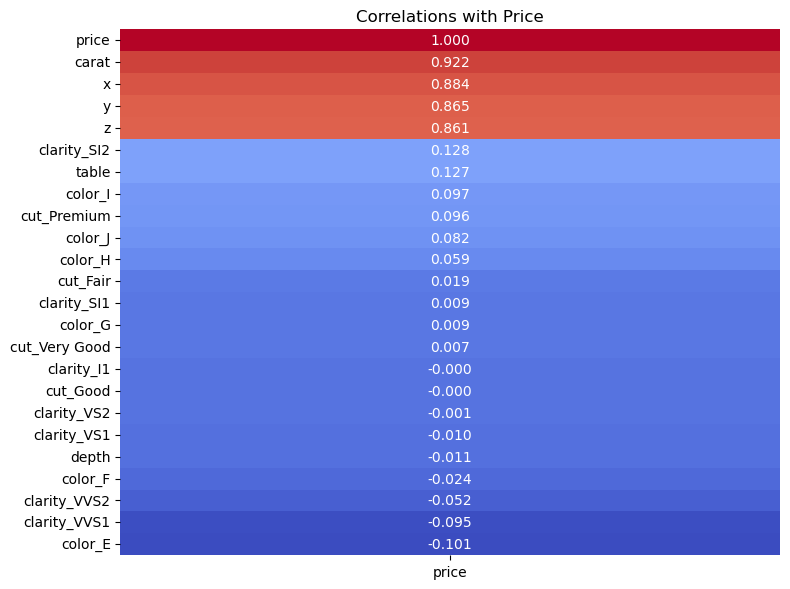

Comment:
 This heatmap is to show correlations with price, sorted by strenght.


In [61]:
# 4.1 Create a condensed heatmap for correlations with the price column
plt.figure(figsize=(8, 6))
correlation = diamond.corr()['price'].sort_values(ascending=False)
sns.heatmap(correlation.to_frame(), annot=True, fmt=".3f", cbar=False, cmap='coolwarm')
plt.title('Correlations with Price')
plt.tight_layout()
plt.show()


print("Comment:")
print(" This heatmap is to show correlations with price, sorted by strenght.")

In [53]:
# 4.2 Use the column with the strongest correlation to split the data
strongest_corr_column = correlation.index[1]  # Skipping 'price' itself
X = diamond[[strongest_corr_column]]
y = diamond['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [54]:
# 4.3 Create and fit a LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"\n4.3: Model R² score on test data: {score:.2f}")
print("Comment: A score close to 1 indicates a strong predictive model. A low score indicates poor predictive power.")



4.3: Model R² score on test data: 0.85
Comment: A score close to 1 indicates a strong predictive model. A low score indicates poor predictive power.


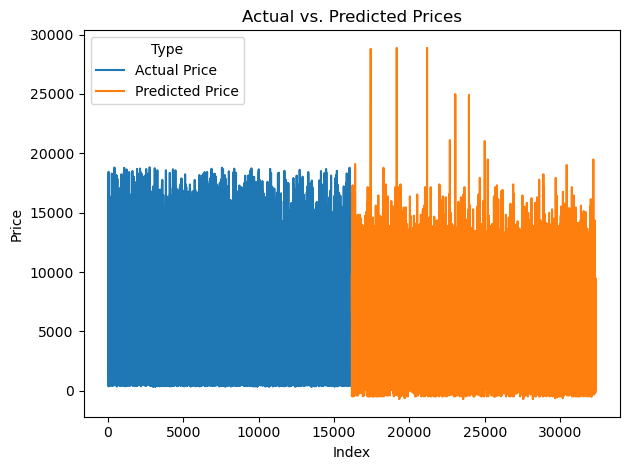

In [55]:
# 4.4 Predict y values and visualize predictions vs. actuals
y_pred = model.predict(X_test)
result_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred}).reset_index(drop=True)
melted_result = result_df.melt(value_vars=['Actual Price', 'Predicted Price'], var_name='Type', value_name='Price')
sns.lineplot(data=melted_result, x=melted_result.index, y='Price', hue='Type')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [56]:
# 4.5 Check correlations with price without a heatmap
print("\n4.5: Correlations with Price (non-heatmap):")
print(correlation)


4.5: Correlations with Price (non-heatmap):
price            1.000000
carat            0.921591
x                0.884435
y                0.865421
z                0.861249
clarity_SI2      0.128420
table            0.127134
color_I          0.097125
cut_Premium      0.095706
color_J          0.081710
color_H          0.059223
cut_Fair         0.018728
clarity_SI1      0.008957
color_G          0.008556
cut_Very Good    0.006593
clarity_I1      -0.000255
cut_Good        -0.000312
clarity_VS2     -0.001062
clarity_VS1     -0.009886
depth           -0.010647
color_F         -0.024161
clarity_VVS2    -0.052381
clarity_VVS1    -0.095266
color_E         -0.101089
Name: price, dtype: float64


In [57]:
# 4.6 Split diamond data into test and training datasets using price as the dependent variable
X_full = diamond.drop(columns=['price'])
X_full = pd.get_dummies(X_full, drop_first=True)  # Convert categorical variables
y_full = diamond['price']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42)


In [58]:
# 4.7 Create and fit the model, score with test and training datasets
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)
train_score = model_full.score(X_train_full, y_train_full)
test_score = model_full.score(X_test_full, y_test_full)
print(f"\n4.7: Model R² score on training data: {train_score:.2f}")
print(f"Model R² score on test data: {test_score:.2f}")



4.7: Model R² score on training data: 0.92
Model R² score on test data: 0.92


/var/folders/4g/31qgn7fj3012vj3921fq69f80000gn/T/ipykernel_3193/2102363284.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


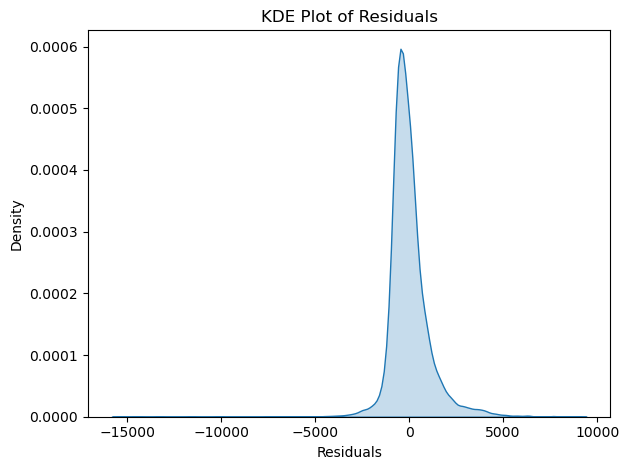


Comment on KDE Plot:
The KDE plot of residuals should ideally be centered around 0 with minimal spread. A wide spread or non-centered plot indicates model errors or potential bias.


In [60]:
# 4.8 Make predictions, calculate residuals, and create a KDE plot
y_pred_full = model_full.predict(X_test_full)
residuals = y_test_full - y_pred_full
sns.kdeplot(residuals, shade=True)
plt.title('KDE Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.tight_layout()
plt.show()



# Comment on the KDE plot
print("\nComment on KDE Plot:")
print("The KDE plot of residuals should ideally be centered around 0 with minimal spread. A wide spread or non-centered plot indicates model errors or potential bias.")

In [ ]:
# Part 5

In [69]:
bos_data = pd.read_csv("BostonHousing.csv")
from sklearn.preprocessing import MinMaxScaler

In [73]:
# Define features (first 12 columns) and target ('CAT. MEDV')
X = bos_data.iloc[:, :12]
y = bos_data['CAT. MEDV']

In [74]:
# Split data into 60% training and 40% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)


In [75]:
# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [76]:
# Define the new tract with feature names
new_tract = pd.DataFrame({
    'CRIM': [0.02], 'ZN': [0], 'INDUS': [18], 'CHAS': [1], 'NOX': [0.538],
    'RM': [6], 'AGE': [92], 'DIS': [1.123], 'RAD': [22], 'TAX': [607],
    'PTRATIO': [21], 'LSTAT': [1]
})
new_tract_scaled = scaler.transform(new_tract)


In [77]:
# I picked k values from 1 to 10 and calculated accuracy
best_k = 1
best_accuracy = 0
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

In [78]:
# Classification of the new tract using k=10 (first 10 nearest neighbors)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train_scaled, y_train)
new_tract_class_10 = knn_10.predict(new_tract_scaled)[0]


In [79]:
# Classification of the new tract using the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
new_tract_class_best = knn_best.predict(new_tract_scaled)[0]



In [80]:
# K mean strategy results
print(f"Best k: {best_k}")
print(f"Classification of new tract (k=10): {new_tract_class_10}")
print(f"Classification of new tract (best k={best_k}): {new_tract_class_best}")
print("\nAccuracy for k values from 1 to 10:")
for i, acc in enumerate(accuracies, start=1):
    print(f"k={i}: Accuracy={acc:.2f}")

Best k: 3
Classification of new tract (k=10): 0
Classification of new tract (best k=3): 1

Accuracy for k values from 1 to 10:
k=1: Accuracy=0.94
k=2: Accuracy=0.93
k=3: Accuracy=0.95
k=4: Accuracy=0.94
k=5: Accuracy=0.93
k=6: Accuracy=0.93
k=7: Accuracy=0.92
k=8: Accuracy=0.92
k=9: Accuracy=0.92
k=10: Accuracy=0.93


In [83]:
print("Commnet:")
print(" looking at the above k values k=3 with a 95% gives us the best k-mean to use")

Commnet:
 looking at the above k values k=3 with a 95% gives us the best k-mean to use
